### 1. Investment Trends Over Time

Total Tech Investment Per Year (2019-2024)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

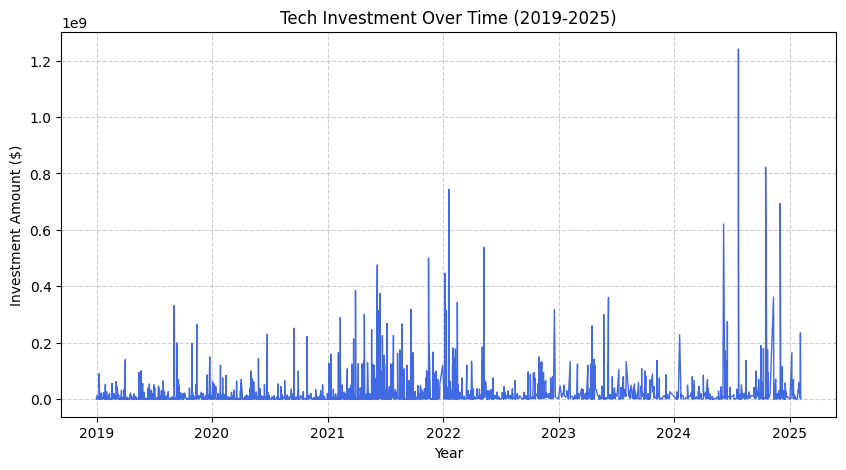

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
deals_df = pd.read_csv("../data/deals_updated.csv")
deals_df["date"] = pd.to_datetime(deals_df["date"])

# Sort by date
deals_df = deals_df.sort_values("date")

# Plot investment amounts over time
plt.figure(figsize=(10, 5))
plt.plot(deals_df["date"], deals_df["amount"], color="royalblue", linewidth=1)

# Format x-axis to only show years
plt.xticks(pd.date_range(start=deals_df["date"].min(), end=deals_df["date"].max(), freq="YS"),
           labels=[d.year for d in pd.date_range(start=deals_df["date"].min(), end=deals_df["date"].max(), freq="YS")])

plt.title("Tech Investment Over Time (2019-2025)")
plt.xlabel("Year")
plt.ylabel("Investment Amount ($)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

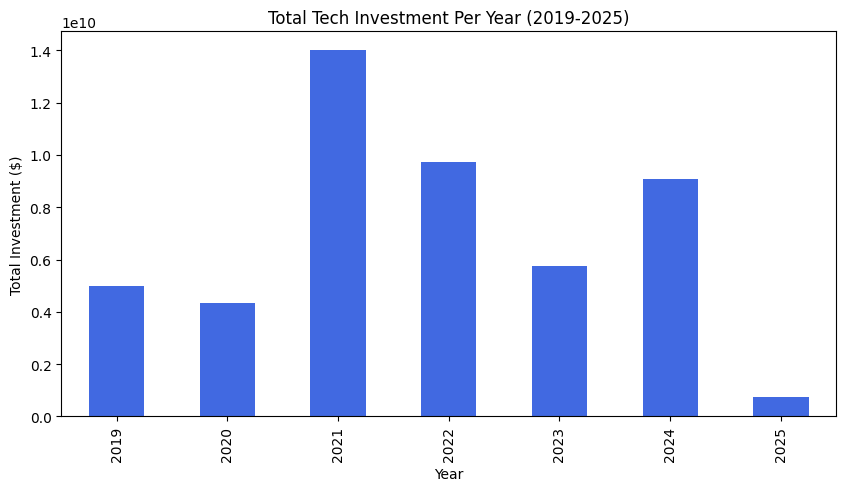

In [7]:
deals_df = pd.read_csv("../data/deals_updated.csv")
deals_df["date"] = pd.to_datetime(deals_df["date"])

# Group by year and sum investment amounts
yearly_funding = deals_df.groupby(deals_df["date"].dt.year)["amount"].sum()

# Plot yearly funding trend
plt.figure(figsize=(10,5))
yearly_funding.plot(kind="bar", color="royalblue")
plt.title("Total Tech Investment Per Year (2019-2025)")
plt.xlabel("Year")
plt.ylabel("Total Investment ($)")
plt.show()

Deal Volume and Funding Size Trends

In [21]:
# loading and converting date col to datetime
deals_df = pd.read_csv("../data/deals_updated.csv")
deals_df["date"] = pd.to_datetime(deals_df["date"])
deals_df["year"] = deals_df["date"].dt.year
deals_df.drop_duplicates().to_csv("../data/deals_updated.csv", index=False)

In [22]:
# number of deals per year
deals_df = deals_df[deals_df["year"] <= 2024]
deals_per_year = deals_df.groupby("year")["id"].count()
deals_per_year.name = "deal_count"

In [25]:
# average deal size per year
avg_deal_size_per_year = deals_df.groupby("year")["amount"].mean()
avg_deal_size_per_year.name = "avg_deal_size"
avg_deal_size_per_year = avg_deal_size_per_year[deals_df["year"] <= 2024]

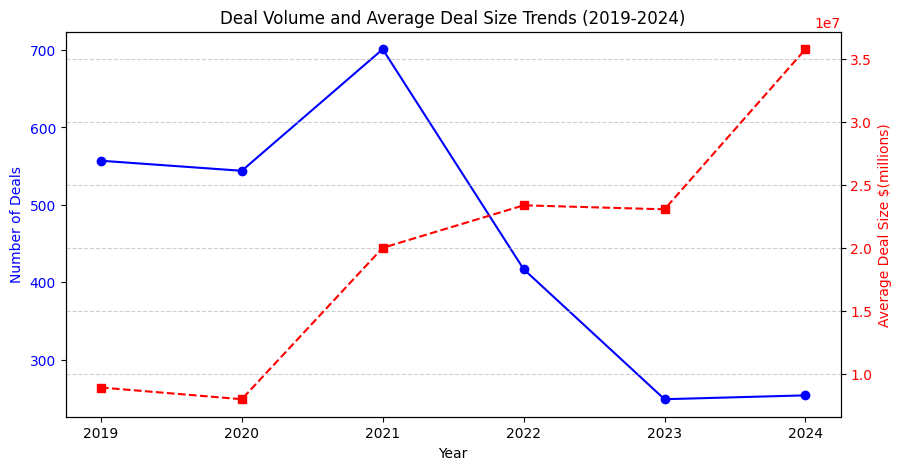

In [27]:
# deal count and average deal size trends
fig, ax1 = plt.subplots(figsize=(10, 5))

# deal count
ax1.plot(deals_per_year.index, deals_per_year, color="blue", marker="o", label="Number of Deals")
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Deals", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# second y-axis for average deal size
ax2 = ax1.twinx()
ax2.plot(avg_deal_size_per_year.index, avg_deal_size_per_year, color="red", marker="s", linestyle="dashed", label="Average Deal Size")
ax2.set_ylabel("Average Deal Size $(millions)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Deal Volume and Average Deal Size Trends (2019-2024)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Investment Changes Across Different Deal Sizes

In [35]:
import pandas as pd

# Load dataset
deals_df = pd.read_csv("../data/deals_updated.csv")

# convert date to datetime and extract year
deals_df["date"] = pd.to_datetime(deals_df["date"])
deals_df["year"] = deals_df["date"].dt.year
deals_df = deals_df[deals_df["year"] <= 2024]

# deal size categories
def categorize_deal(amount):
    if amount < 100_000:
        return "Small (<$100K)"
    elif 100_000 <= amount < 1_000_000:
        return "Medium ($100K-$1M)"
    elif 1_000_000 <= amount < 5_000_000:
        return "Large ($1M-$5M)"
    elif 5_000_000 <= amount < 100_000_000:
        return "Mega ($5M-$100M)"
    else:
        return "Huge ($100M+)"

# apply categorization
deals_df["deal_category"] = deals_df["amount"].apply(categorize_deal)

# count the number of deals in each category per year
deal_category_counts = deals_df.groupby(["year", "deal_category"])["id"].count().unstack(fill_value=0)

# display results
print(deal_category_counts)

deal_category  Huge ($100M+)  Large ($1M-$5M)  Medium ($100K-$1M)  \
year                                                                
2019                       8              154                 115   
2020                       7              139                 110   
2021                      46              202                 109   
2022                      21              131                  44   
2023                      15               81                   5   
2024                      17               93                   4   

deal_category  Mega ($5M-$100M)  Small (<$100K)  
year                                             
2019                        127             153  
2020                        161             127  
2021                        224             120  
2022                        196              25  
2023                        134              14  
2024                        117              23  


In [36]:
import pandas as pd

# Load the dataset
deals_df = pd.read_csv("../data/deals_updated.csv")

# Convert the 'date' column to datetime and extract the year
deals_df["date"] = pd.to_datetime(deals_df["date"], errors="coerce")
deals_df["year"] = deals_df["date"].dt.year

# Count the proportion of deals at each investment stage
stage_proportions = deals_df["roundType"].value_counts(normalize=True) * 100

# Calculate the average deal size per funding stage
avg_deal_size_per_stage = deals_df.groupby("roundType")["amount"].mean()

# Track how deal size has evolved over time per funding stage
deal_size_trends = deals_df.groupby(["year", "roundType"])["amount"].mean().unstack()

# Track the number of deals per funding stage over time
deal_count_trends = deals_df.groupby(["year", "roundType"])["id"].count().unstack(fill_value=0)

# Display the results
print("Stage Proportions (%):\n", stage_proportions)
print("\nAverage Deal Size Per Stage:\n", avg_deal_size_per_stage)
print("\nDeal Size Trends Over Time:\n", deal_size_trends)
print("\nDeal Count Trends Over Time:\n", deal_count_trends)

Stage Proportions (%):
 roundType
Seed                   38.777737
Series A               22.590033
Pre-Seed               19.570753
Series B               10.258276
Series C                3.710440
Grant                   1.491451
Series D                1.309567
Series D+               1.236813
Series E                0.472899
Equity Crowdfunding     0.327392
Series F                0.145507
Series G                0.109131
Name: proportion, dtype: float64

Average Deal Size Per Stage:
 roundType
Equity Crowdfunding    1.584084e+06
Grant                  4.791444e+06
Pre-Seed               5.525544e+05
Seed                   2.832051e+06
Series A               1.327002e+07
Series B               3.865751e+07
Series C               8.210831e+07
Series D               1.695265e+08
Series D+              1.950443e+08
Series E               1.463398e+08
Series F               4.502295e+08
Series G               4.042281e+08
Name: amount, dtype: float64

Deal Size Trends Over Time:
 round

### 2. Funding Stages Analysis

Determine the proportion of deals at each investment stage (Pre-Seed, Seed, Series A, B, C, and beyond).

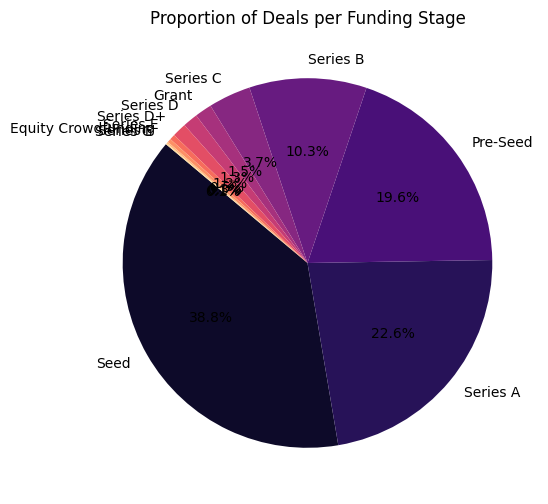

In [42]:
# Load Deals Data
deals_df = pd.read_csv("../data/deals_updated.csv")

# Count the number of deals per funding stage
funding_stage_counts = deals_df["roundType"].value_counts()

# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(funding_stage_counts, labels=funding_stage_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("magma", len(funding_stage_counts)))
plt.title("Proportion of Deals per Funding Stage")
plt.show()

Calculate the average deal size per funding stage and how it has evolved.

<Figure size 1000x600 with 0 Axes>

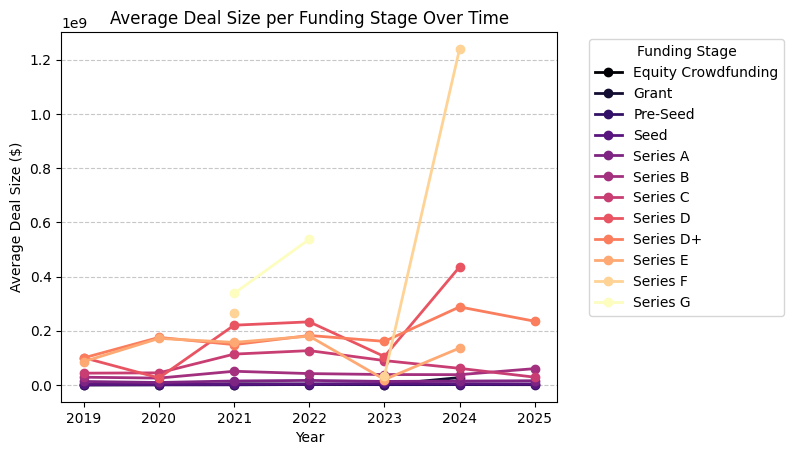

In [43]:
# Convert 'date' column to datetime and extract year
deals_df["date"] = pd.to_datetime(deals_df["date"])
deals_df["year"] = deals_df["date"].dt.year

# Group by Year and Funding Stage, then calculate average deal size
avg_deal_size = deals_df.groupby(["year", "roundType"])["amount"].mean().unstack()

# Plot Line Chart
plt.figure(figsize=(10, 6))
avg_deal_size.plot(kind="line", marker="o", colormap="magma", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Average Deal Size ($)")
plt.title("Average Deal Size per Funding Stage Over Time")
plt.legend(title="Funding Stage", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Identify trends in the number and size of deals per stage over multiple years.

<Figure size 1000x600 with 0 Axes>

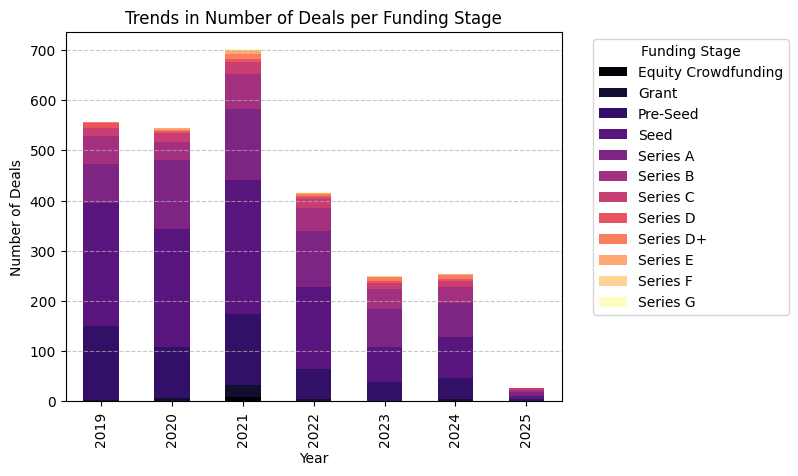

In [44]:
# Count number of deals per funding stage per year
deals_per_stage = deals_df.groupby(["year", "roundType"])["id"].count().unstack()

# Plot Stacked Bar Chart
plt.figure(figsize=(10, 6))
deals_per_stage.plot(kind="bar", stacked=True, colormap="magma")
plt.xlabel("Year")
plt.ylabel("Number of Deals")
plt.title("Trends in Number of Deals per Funding Stage")
plt.legend(title="Funding Stage", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### 3. Sectoral and Regional Insights

Identify the top investment categories nationally (e.g., SaaS, FinTech, HealthTech, AI, Blockchain). 

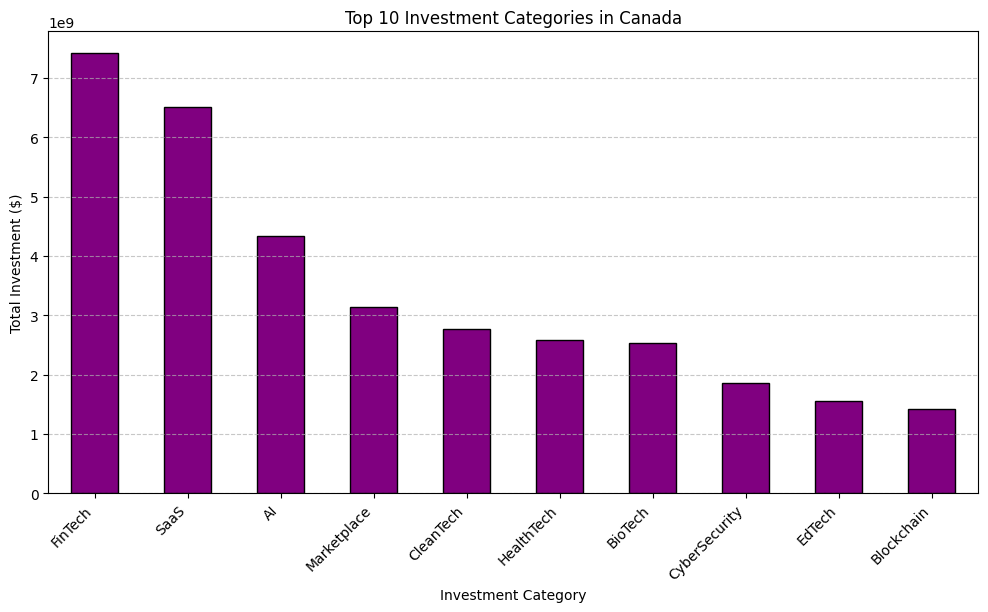

In [9]:
# Enable inline plotting for Jupyter Notebook
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

# Load deals data
deals_df = pd.read_csv("../data/deals_updated.csv")

# Count total investments per primaryTag (category)
category_investment = deals_df.groupby("primaryTag")["amount"].sum().sort_values(ascending=False).head(10)

# Create the plot
plt.figure(figsize=(12, 6))
category_investment.plot(kind="bar", color="purple", edgecolor="black")
plt.xlabel("Investment Category")
plt.ylabel("Total Investment ($)")
plt.title("Top 10 Investment Categories in Canada")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

Compare investment trends across key Canadian regions (Toronto, Vancouver, Montreal, Calgary, Waterloo, etc.).

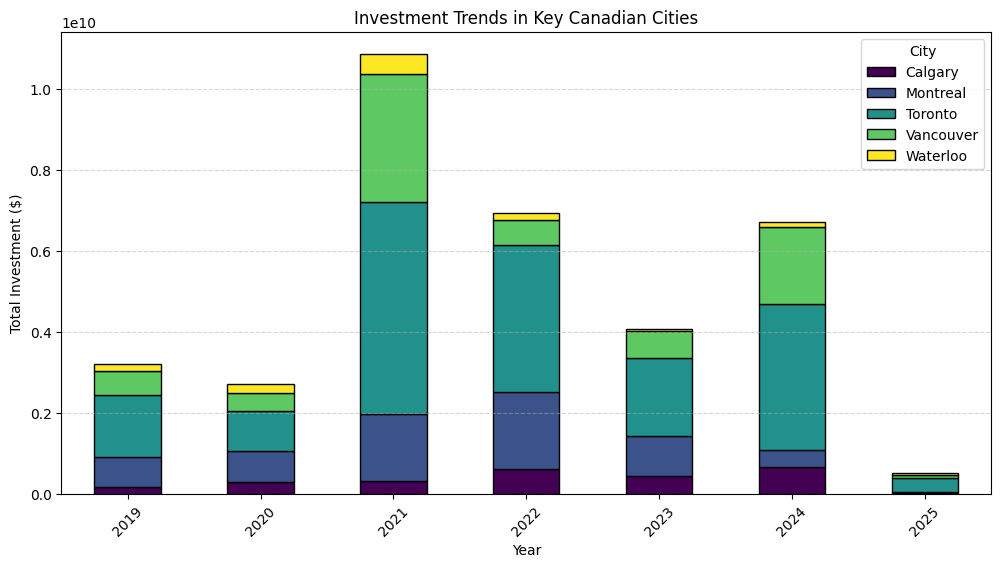

In [10]:
# Filter data for key cities
key_cities = ["Toronto", "Vancouver", "Montreal", "Calgary", "Waterloo"]
regional_investment = deals_df[deals_df["headquarters"].isin(key_cities)].groupby(["year", "headquarters"])["amount"].sum().unstack()

# Plot
ax = regional_investment.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Total Investment ($)")
plt.title("Investment Trends in Key Canadian Cities")
plt.legend(title="City", bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Examine regional differences in investment volume, deal sizes, and category preferences.

/var/folders/_5/fg_6jcjj6991gphz5_y_wwnc0000gn/T/ipykernel_82993/3494680482.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="headquarters", y="amount", data=regional_deals, palette="magma")


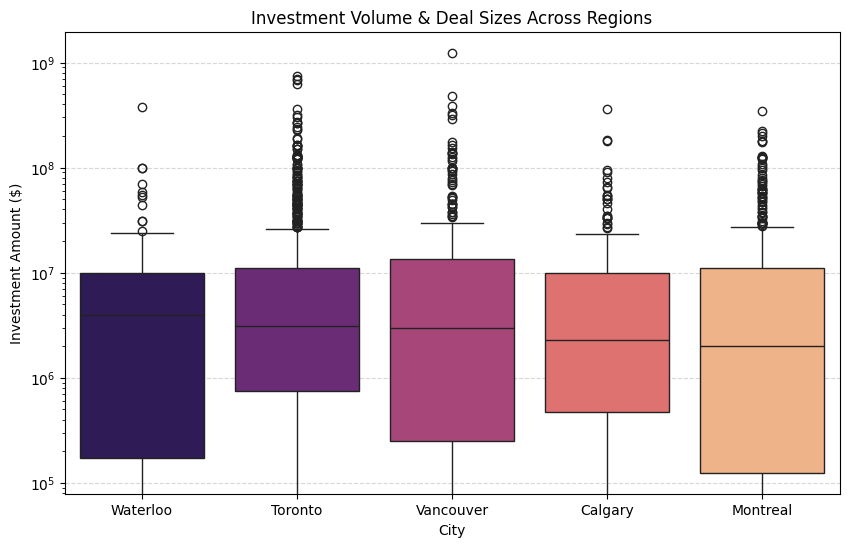

In [11]:
import seaborn as sns

# Filter data for key cities
regional_deals = deals_df[deals_df["headquarters"].isin(key_cities)]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="headquarters", y="amount", data=regional_deals, palette="magma")
plt.yscale("log")  # Log scale to handle outliers
plt.xlabel("City")
plt.ylabel("Investment Amount ($)")
plt.title("Investment Volume & Deal Sizes Across Regions")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### 4. Investor Demographics & Behavior

Analyze investment firm demographics (Canada vs. US vs. other international investors).

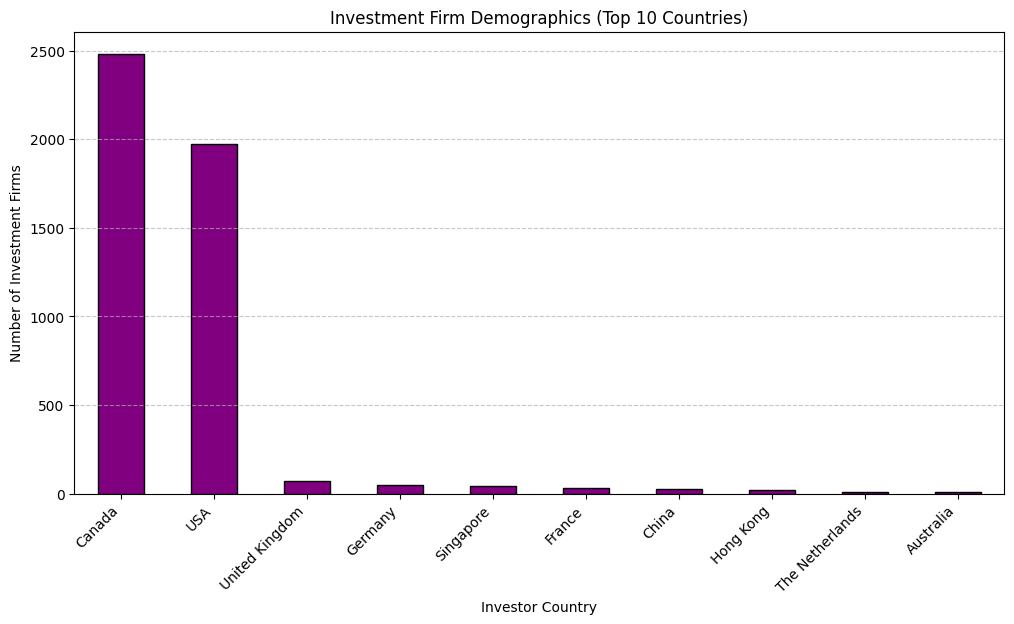

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
deals_df = pd.read_csv("../data/deals_updated.csv")
deal_investors_df = pd.read_csv("../data/dealInvestor_updated.csv")
investors_df = pd.read_csv("../data/investors_updated.csv")

# **1️⃣ Investment Firm Demographics**
investor_counts = deal_investors_df["investorCountry"].value_counts().head(10)

plt.figure(figsize=(12, 6))
investor_counts.plot(kind="bar", color="purple", edgecolor="black")
plt.xlabel("Investor Country")
plt.ylabel("Number of Investment Firms")
plt.title("Investment Firm Demographics (Top 10 Countries)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Study the number of investment firms per funding stage by country.

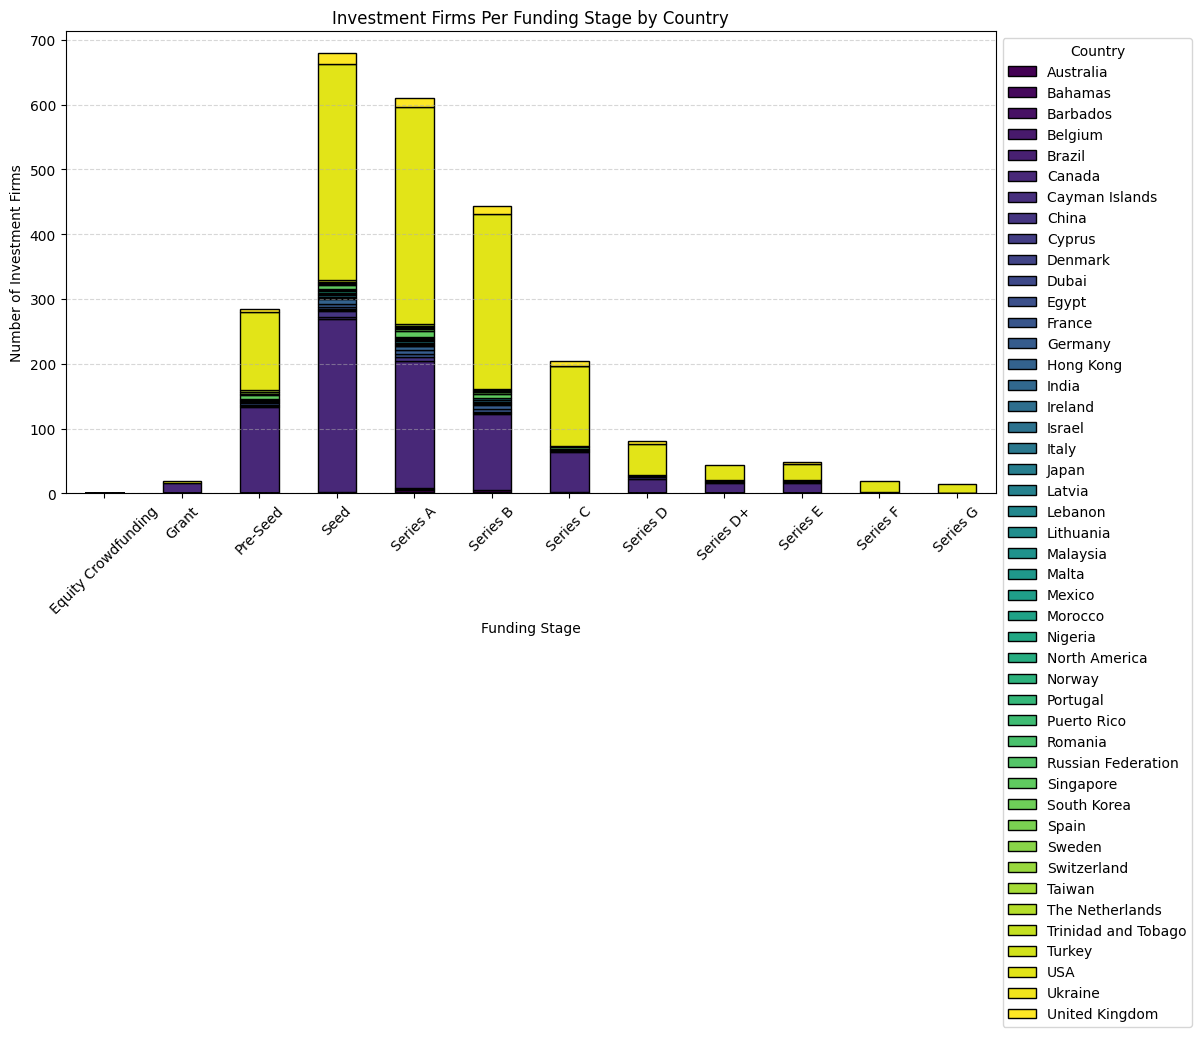

In [18]:

stage_country_counts = deal_investors_df.groupby(["roundType", "investorCountry"])["investorId"].nunique().unstack()

stage_country_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.xlabel("Funding Stage")
plt.ylabel("Number of Investment Firms")
plt.title("Investment Firms Per Funding Stage by Country")
plt.legend(title="Country", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Compare average deal sizes per stage based on investor geography.


Identify leading investors per stage and their influence on funding success.

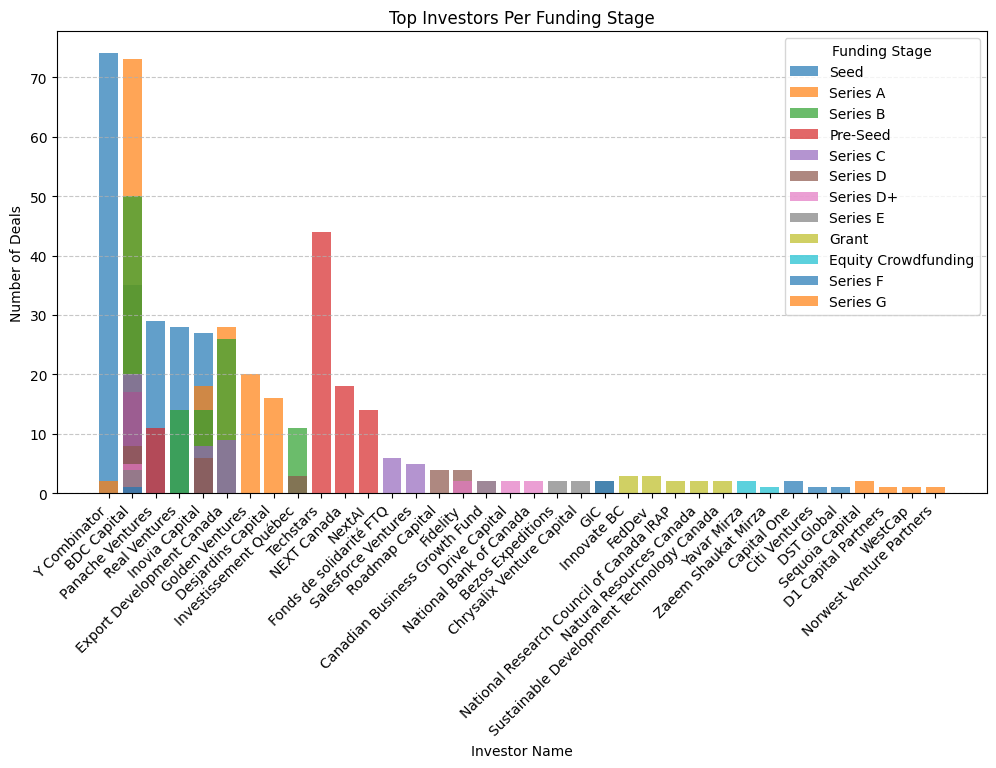

In [33]:
top_investors = deal_investors_df.groupby(["roundType", "investorName"])["dealId"].count().reset_index()
top_investors = top_investors.sort_values(by="dealId", ascending=False).groupby("roundType").head(5)

plt.figure(figsize=(12, 6))
for round_type in top_investors["roundType"].unique():
    subset = top_investors[top_investors["roundType"] == round_type]
    plt.bar(subset["investorName"], subset["dealId"], label=round_type, alpha=0.7)

plt.xlabel("Investor Name")
plt.ylabel("Number of Deals")
plt.title("Top Investors Per Funding Stage")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Funding Stage")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Highlight the most active investment firms and their yearly activity.

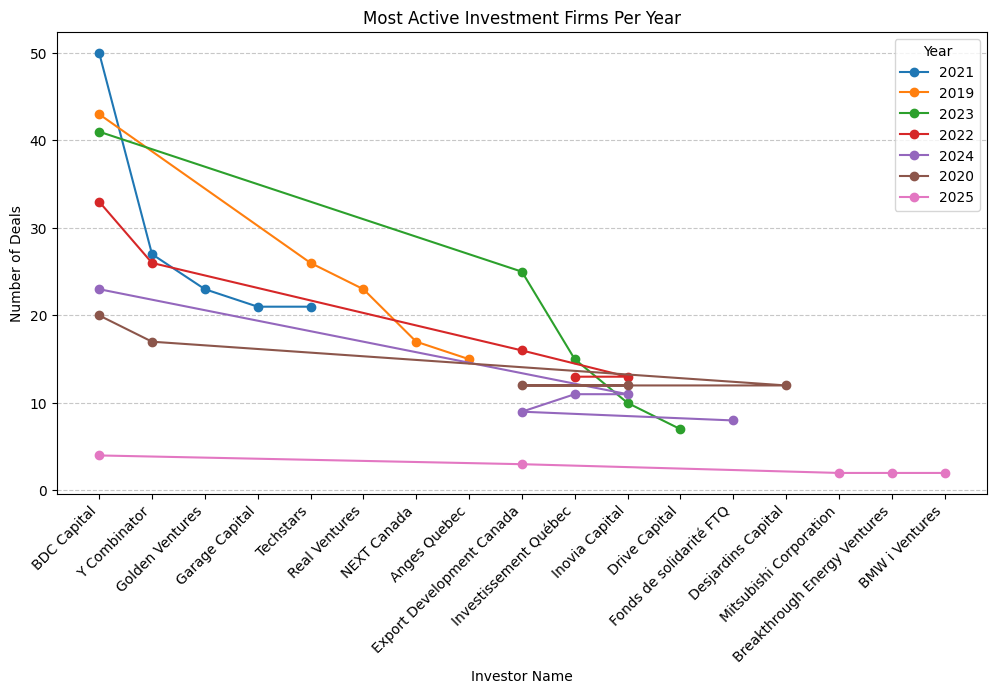

In [34]:
active_investors = deal_investors_df.groupby(["year", "investorName"])["dealId"].count().reset_index()
active_investors = active_investors.sort_values(by="dealId", ascending=False).groupby("year").head(5)

plt.figure(figsize=(12, 6))
for year in active_investors["year"].unique():
    subset = active_investors[active_investors["year"] == year]
    plt.plot(subset["investorName"], subset["dealId"], marker="o", linestyle="-", label=year)

plt.xlabel("Investor Name")
plt.ylabel("Number of Deals")
plt.title("Most Active Investment Firms Per Year")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [4]:
df = pd.read_csv("../data/deals_updated.csv")
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['id', 'companyId', 'companyName', 'headquarters', 'ecosystemName',
       'ecosystemSecondary', 'primaryTag', 'leadInvestors', 'investors',
       'roundType', 'date', 'amount', 'year', 'yearQuarter'],
      dtype='object')
